<h1>Introduction</h1>

This project uses K nearest neighbors to predict car sales prices. In the end I measure the accuracy using mean squared error. I test several features and K-values in the model.

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars=pd.read_csv('imports-85.data', header=None, names=columns)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h1>Columns</h1>

Target column is price. Columns that we can use as features: symboling, normalized_losses (maybe not this one since it has missing data), num_doors (converting to integers), wheel_base, length, width, height, curb_weight, num_cylinders (convert to int), engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg. Now not all of these may be suitable as features. 

In [13]:
import numpy as np
cars.replace('?', np.nan, inplace=True)
cars['normalized_losses']=cars['normalized_losses'].astype('float')
mean=cars['normalized_losses'].mean()
cars['normalized_losses'].replace(np.nan, mean, inplace=True)
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

<h1>Data Cleaning</h1>

Here I replaced some non-useful values, converted types, then replaced NaN values with the mean of the column. I do the same approach for several more columns, but not all the columns where I could potentially do this.

In [14]:
null_data = cars[cars.isnull().any(axis=1)]
null_data

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [15]:
small=cars[cars['engine_size']<120]
small['bore']=small['bore'].astype(float)
small['stroke']=small['stroke'].astype(float)
cars['stroke'].replace(np.nan, small['stroke'].mean(), inplace=True)
cars['bore'].replace(np.nan, small['bore'].mean(), inplace=True)
null_data = cars[cars.isnull().any(axis=1)]
null_data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN
130,0,122.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
131,2,122.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


<h2>Small means</h2>

Here I set some missing values to the mean of a subset of the data, small cars only, to get a more accurate replacement. Below I drop all of the remaining missing rows, which are those where price is missing. Can't have a missing target column in the data. I keep the non-numeric columns for now, but later on they get removed essentially because I do a subset of the data where the types are numeric only. 

In [16]:
cars=cars.dropna()

In [17]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
symboling            197 non-null int64
normalized_losses    197 non-null float64
make                 197 non-null object
fuel_type            197 non-null object
aspiration           197 non-null object
num_doors            197 non-null object
body_style           197 non-null object
drive_wheels         197 non-null object
engine_location      197 non-null object
wheel_base           197 non-null float64
length               197 non-null float64
width                197 non-null float64
height               197 non-null float64
curb_weight          197 non-null int64
engine_type          197 non-null object
num_cylinders        197 non-null object
engine_size          197 non-null int64
fuel_system          197 non-null object
bore                 197 non-null object
stroke               197 non-null object
compression_ratio    197 non-null float64
horsepower           197 non-nu

In [18]:
cars['bore']=cars['bore'].astype(float)
cars['stroke']=cars['stroke'].astype(float)
cars['horsepower']=cars['horsepower'].astype(int)
cars['peak_rpm']=cars['peak_rpm'].astype(int)
cars['price']=cars['price'].astype(int)
#Setting some object types to numeric types
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
symboling            197 non-null int64
normalized_losses    197 non-null float64
make                 197 non-null object
fuel_type            197 non-null object
aspiration           197 non-null object
num_doors            197 non-null object
body_style           197 non-null object
drive_wheels         197 non-null object
engine_location      197 non-null object
wheel_base           197 non-null float64
length               197 non-null float64
width                197 non-null float64
height               197 non-null float64
curb_weight          197 non-null int64
engine_type          197 non-null object
num_cylinders        197 non-null object
engine_size          197 non-null int64
fuel_system          197 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    197 non-null float64
horsepower           197 non-

In [32]:
columns_numeric=list()
for column in list(cars.columns):
    if cars[column].dtype!='object':
        columns_numeric.append(column)
columns_numeric

['symboling',
 'normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price']

In [38]:
columns_numeric.remove('price')
#Normalize the data
cars[columns_numeric]=(cars[columns_numeric]-cars[columns_numeric].min())/(cars[columns_numeric].max()-cars[columns_numeric].min())
cars[columns_numeric].head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895


<h1>KNN Train/ Test</h1>

Below I make a simple function to calculate the RMSE using KNN model. I then use it to find the column corresponding to the minimum RMSE, which would mean, the feature that most corresponds to price.

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training,target,df):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor()
    knn.fit(train_df[[training]], train_df[target])
    predictions=knn.predict(test_df[[training]])
    mse=mean_squared_error(test_df[target], predictions)
    rmse=mse**(1/2)
    return rmse

rmses=dict()
for column in columns_numeric:
    rmses[column]=knn_train_test(column, 'price', cars)
min(rmses, key=rmses.get)   

'curb_weight'

<h2>KNN Modifications</h2>

I added a parameter for k-value to the function.

In [41]:
def knn_train_test(training,target,df,k):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[training]], train_df[target])
    predictions=knn.predict(test_df[[training]])
    mse=mean_squared_error(test_df[target], predictions)
    rmse=mse**(1/2)
    return rmse

In [22]:
rmses_ks=dict()
for column in columns_numeric:
    for x in [1,3,5,7,9]:
        rmses_ks[column+'  k equals '+str(x)]=knn_train_test(column, 'price', cars, x)
rmses_ks    

{'bore  k equals 1': 0.28269263410227702,
 'bore  k equals 3': 0.2424003884854504,
 'bore  k equals 5': 0.21148722699401293,
 'bore  k equals 7': 0.19480284635505482,
 'bore  k equals 9': 0.16253503574990588,
 'city_mpg  k equals 1': 0.11272226611824102,
 'city_mpg  k equals 3': 0.099145516217973184,
 'city_mpg  k equals 5': 0.090568914962874114,
 'city_mpg  k equals 7': 0.088238532738654243,
 'city_mpg  k equals 9': 0.079337913566299934,
 'compression_ratio  k equals 1': 0.17330435982451683,
 'compression_ratio  k equals 3': 0.15245746252674569,
 'compression_ratio  k equals 5': 0.1680076551292515,
 'compression_ratio  k equals 7': 0.17403452473032704,
 'compression_ratio  k equals 9': 0.14914535945234048,
 'curb_weight  k equals 1': 0.093200497919210243,
 'curb_weight  k equals 3': 0.06314681407534993,
 'curb_weight  k equals 5': 0.06240155403604776,
 'curb_weight  k equals 7': 0.067886426461119864,
 'curb_weight  k equals 9': 0.066188721317248747,
 'engine_size  k equals 1': 0.12549

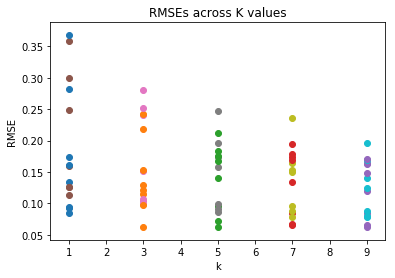

In [23]:
import re

for key in rmses_ks:
    if 'equals 1' in key:
        plt.scatter(1, rmses_ks[key])
    if 'equals 3' in key:
        plt.scatter(3, rmses_ks[key])
    if 'equals 5' in key:
        plt.scatter(5, rmses_ks[key])
    if 'equals 7' in key:
        plt.scatter(7, rmses_ks[key])
    if 'equals 9' in key:
        plt.scatter(9, rmses_ks[key])
plt.title('RMSEs across K values')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

<h2> K-value explanation </h2>

For this data, a higher K-value means a more accurate prediction measured from RMSE. 

In [24]:
def knn_train_test(training,target,df):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor()
    knn.fit(train_df[training], train_df[target])
    predictions=knn.predict(test_df[training])
    mse=mean_squared_error(test_df[target], predictions)
    rmse=mse**(1/2)
    return rmse

In [25]:
import operator

sorted_rmses = sorted(rmses.items(), key=operator.itemgetter(1))
sorted_rmses

[('curb_weight', 0.06240155403604776),
 ('highway_mpg', 0.071712000124226419),
 ('engine_size', 0.086057791257658348),
 ('city_mpg', 0.090568914962874114),
 ('width', 0.096260253872079954),
 ('horsepower', 0.09909079566629532),
 ('wheel_base', 0.14030101049502916),
 ('height', 0.15801574539052451),
 ('compression_ratio', 0.1680076551292515),
 ('length', 0.17397014156971405),
 ('peak_rpm', 0.17596221741247833),
 ('symboling', 0.18345457974791615),
 ('stroke', 0.19640346606007952),
 ('bore', 0.21148722699401293),
 ('normalized_losses', 0.24758869125978947)]

<h1>Features</h1>

Now we have a list of features to try to improve the model's accuracy. The sorted rmses shows which features correspond the most to price. Lower RMSE= better relation to price

In [26]:
knn_train_test(['curb_weight', 'highway_mpg'],'price', cars)

0.079174056605375631

In [27]:
knn_train_test(['curb_weight', 'highway_mpg', 'engine_size'],'price', cars)

0.073017156348069198

In [28]:
knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg'],'price', cars)

0.061681589424781837

In [29]:
knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg', 'width'],'price', cars)

0.057084661098346062

In [42]:
#Modify the function to allow for flexible training and target columns
def knn_train_test(training,target,df,k):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[training], train_df[target])
    predictions=knn.predict(test_df[training])
    mse=mean_squared_error(test_df[target], predictions)
    rmse=mse**(1/2)
    return rmse

<h1>Varying K Values</h1>

Now I vary the k-values. For models with fewer features, higher k-values are always preferable. For models with increasing numbers of features, the models reach peak accuracy at a lower k-value. 

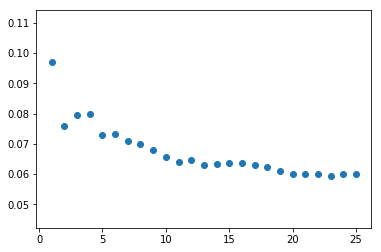

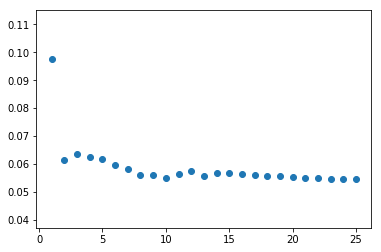

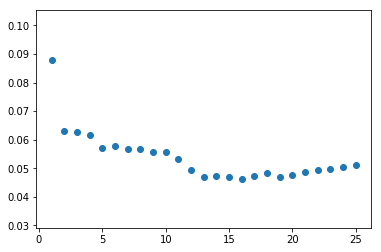

23
23


16

In [31]:
rmses_3features=dict()
for k in range(1,26):
    rmses_3features[k]=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size'],'price', cars, k)
plt.scatter(list(rmses_3features.keys()),list(rmses_3features.values()))
plt.show()

rmses_4features=dict()
for k in range(1,26):
    rmses_4features[k]=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg'],'price', cars, k)
plt.scatter(list(rmses_4features.keys()),list(rmses_4features.values()))
plt.show()

rmses_5features=dict()
for k in range(1,26):
    rmses_5features[k]=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg', 'width'],'price', cars, k)
plt.scatter(list(rmses_5features.keys()),list(rmses_5features.values()))
plt.show()

print(min(rmses_3features, key=rmses_3features.get))
print(min(rmses_4features, key=rmses_4features.get))
min(rmses_5features, key=rmses_5features.get)

<h1>Optimal K values</h1>

23 is the optimal k value for models with three and four features, but 16 is optimal for the five feature model. 

It might be worth looking into what balance of variance and bias is best for this model.

<h2>Detecting Overfitting</h2>

Next I modify the knn_train_test function so that it returns rmse on both the training and test data sets. If the RMSE on the test set is much higher than the train set, the model may be overfitting. I can then test it with different features.

In [43]:
def knn_train_test(training,target,df,k):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[training], train_df[target])
    train_predictions=knn.predict(train_df[training])
    mse=mean_squared_error(train_df[target], train_predictions)
    train_rmse=mse**(1/2)
    test_predictions=knn.predict(test_df[training])
    mse=mean_squared_error(test_df[target], test_predictions)
    test_rmse=mse**(1/2)
    return(train_rmse, test_rmse)

In [48]:
rmse_3_train,rmse_3_test=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size'],'price', cars, 23)
print(rmse_3_train, rmse_3_test)

rmse_4_train, rmse_4_test=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg'],'price', cars, 23)
print(rmse_4_train, rmse_4_test)

0.108130046535 0.05930258965
0.105548590315 0.0543681947478


<h1>Results of Overfitting testing</h1>

For some reason, the train rmses are <em>higher</em> than the test rmses. This may be because the method generalizes well and because the training set is large, but the test set is small. We can use cross validation and shuffling to get a more accurate measurement. 

In [59]:
from sklearn.model_selection import cross_val_score,KFold

def knn_train_test(training,target,df,k):
    #Shuffling dataset for good measure
    df=df.sample(frac=1)
    #Train and test df
    train=df.iloc[0:int(len(df)*.6)]
    test=df.iloc[int(len(df)*.6):len(df)]
    #KNN instance
    knn=KNeighborsRegressor(n_neighbors=k)
    #setup KFold
    kf=KFold(5, shuffle=False, random_state=1)
    mses=cross_val_score(knn, df[training], df[target], scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    overall_rmse=np.mean(rmses)
    train_mses=cross_val_score(knn, train[training], train[target], scoring='neg_mean_squared_error', cv=kf)
    test_mses=cross_val_score(knn, test[training], test[target], scoring='neg_mean_squared_error', cv=kf)
    train_rmses = np.sqrt(np.absolute(train_mses))
    train_avg_rmse=np.mean(train_rmses)
    test_rmses = np.sqrt(np.absolute(test_mses))
    test_avg_rmse=np.mean(test_rmses)
    return(train_avg_rmse, test_avg_rmse, overall_rmse)

In [62]:
rmse_3_train,rmse_3_test, rmse_3_overall=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size'],'price', cars, 23)
print(rmse_3_train, rmse_3_test, rmse_3_overall)

0.114044671439 0.121539481263 0.10510666746


<h1>Results of Cross Validation</h1>

Surprisingly, with cross validation we get a less accurate model than if we only run predictions on the test_df set up by the previous iteration of the knn_train_test function. It seems that an RMSE of .059... is about the lowest we're going to get. We do get a random result for the RMSEs every time because of df.sample, which shuffles the rows. 

<h1>Conclusion</h1> 

By changing parameters and hyperparameters, I decided that a five-feature model with K of 16 was the most accurate model I was willing to accept. 